In [1]:
import time
import numpy as np                 # package for numerics
import pandas as pd                # package for data frames  
import matplotlib.pyplot as plt    # package for plotting 
import time
import numpy as np                 # package for numerics
import pandas as pd                # package for data frames  
import matplotlib.pyplot as plt    # package for plotting   

In [2]:
Data = pd.read_csv("CleanAndRetimed2.txt", sep = ",")   # Import Minutely data
Data['Datetime'] =  pd.to_datetime(Data['Datetime'])
Dates=(Data.Datetime)
Data.set_index('Datetime', inplace=True)  # df is a timesearies object with indexing of time sesies!
Data=Data.resample('10min').mean()
df=Data
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
Data =Data[Data['T_out'].between(7, 20)]
print(Data.shape)
Data=Data.resample('10min').mean()
df=Data

(16195, 25)


In [3]:
df.insert(1, "MeanOpen", np.mean(df.loc[:,['Win_AFT', 'Win_AFB','Win_ARoof', 'Win_Akip', 'Win_BFT', 'Win_BFB', 'Win_Broof', 'Win_BKip']],axis = 1), allow_duplicates=False)
df=df[df.MeanOpen.between(10,95)]

# Windows % to area and Pig Weight

In [4]:
def eA( theta_max,theta_min,openingPosition,width,height):
   
   eO = (theta_max-theta_min)*openingPosition/100
   eA= width*height*np.sin(eO*np.pi / 180)
   return eA;

In [5]:
df.Win_AFB=eA(53,0,df.Win_AFB,20,1)
df.Win_BFB=eA(53,0,df.Win_BFB,20,1)

df.Win_AFT=eA(90,0,df.Win_AFT,22,0.55) 
df.Win_BFT=eA(90,0,df.Win_BFT,22,0.55)

df.Win_ARoof=eA(53,0,df.Win_ARoof,22,1)
df.Win_Broof=eA(53,0,df.Win_Broof,22,1)

df.Win_Akip=eA(90,0,df.Win_Akip,22,1.1) 
df.Win_BKip=eA(90,0,df.Win_BKip,22,1.1)

#df.dayE=660*(0.95*df.dayE+32)
#df.dayW=660*(0.95*df.dayW+32)


C:\Users\au327049\Conda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


# Wind direction to categorical and dummy !

In [6]:
df.insert(1, "WindD",np.rad2deg(np.arcsin( df.WindDs))% 360)  # insert Wind D 0-360 


In [7]:
df.insert(1, "WindDC",df.WindD.astype(str))


In [8]:

df.loc[df["WindD"].between(210,330),["WindDC"]]="W"

C:\Users\au327049\Conda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [9]:
df.loc[df["WindD"].between(30,150),["WindDC"]]="E"

In [10]:
df.loc[df["WindD"].between(0,30,inclusive=True),["WindDC"]]="P"
df.loc[df["WindD"].between(330,360,inclusive=True),["WindDC"]]="P"
df.loc[df["WindD"].between(150,210,inclusive=True),["WindDC"]]="P"


In [11]:
np.unique(df.WindDC)

array(['E', 'P', 'W'], dtype=object)

In [12]:
df.head()

,T_out,WindDC,WindD,MeanOpen,Rain,SetTemp,MeanT,Spa,MeanRH,MeanC,...,Win_BFB,Win_Broof,Win_BKip,Vfloor_A,Vfloor_B,dayE,dayW,hourS,hourC,group
Datetime,,,,,,,,,,,,,,,,,,,,,
2018-08-03 05:30:00,17.507,W,323.017880,12.563125,0.0,19.0,17.624900,1.730,20.0,638.237155,...,0.0,0.000000,2.655570,4299.786,4397.476,0.0,0.0,0.965926,2.588190e-01,1.0
2018-08-03 05:40:00,17.562,P,338.124913,19.026125,0.0,19.0,17.690350,1.598,20.0,601.027609,...,0.0,0.000000,2.655570,4194.160,4270.203,0.0,0.0,0.965926,2.588190e-01,1.0
2018-08-03 05:50:00,17.932,P,342.330316,21.484750,0.0,19.0,17.752859,1.530,20.0,581.277804,...,0.0,0.000000,2.655570,4249.622,4376.094,0.0,0.0,0.965926,2.588190e-01,1.0
2018-08-03 06:00:00,18.386,W,321.495920,24.577500,0.0,19.0,17.976650,1.442,20.0,563.986865,...,0.0,0.000000,2.655570,4223.938,4299.923,0.0,0.0,1.000000,6.123234e-17,1.0
2018-08-03 06:10:00,18.790,W,318.574451,27.039375,0.0,19.0,18.178150,1.383,20.0,554.696042,...,0.0,0.261498,1.899847,3622.648,4850.292,0.0,0.0,1.000000,6.123234e-17,1.0


In [13]:
df=pd.get_dummies(df, prefix=['WindDC'], columns=['WindDC'])
df.head()

,T_out,WindD,MeanOpen,Rain,SetTemp,MeanT,Spa,MeanRH,MeanC,magI,...,Vfloor_A,Vfloor_B,dayE,dayW,hourS,hourC,group,WindDC_E,WindDC_P,WindDC_W
Datetime,,,,,,,,,,,,,,,,,,,,,
2018-08-03 05:30:00,17.507,323.017880,12.563125,0.0,19.0,17.624900,1.730,20.0,638.237155,0.818131,...,4299.786,4397.476,0.0,0.0,0.965926,2.588190e-01,1.0,0,0,1
2018-08-03 05:40:00,17.562,338.124913,19.026125,0.0,19.0,17.690350,1.598,20.0,601.027609,1.001745,...,4194.160,4270.203,0.0,0.0,0.965926,2.588190e-01,1.0,0,1,0
2018-08-03 05:50:00,17.932,342.330316,21.484750,0.0,19.0,17.752859,1.530,20.0,581.277804,0.945550,...,4249.622,4376.094,0.0,0.0,0.965926,2.588190e-01,1.0,0,1,0
2018-08-03 06:00:00,18.386,321.495920,24.577500,0.0,19.0,17.976650,1.442,20.0,563.986865,0.552072,...,4223.938,4299.923,0.0,0.0,1.000000,6.123234e-17,1.0,0,0,1
2018-08-03 06:10:00,18.790,318.574451,27.039375,0.0,19.0,18.178150,1.383,20.0,554.696042,0.845729,...,3622.648,4850.292,0.0,0.0,1.000000,6.123234e-17,1.0,0,0,1


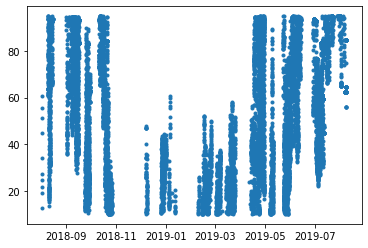

In [14]:
plt.plot(df.MeanOpen,'.')
df=df.drop('MeanOpen',axis=1)

In [15]:
df=df[df.dayW>0]
df=df[df.dayE>0]

In [16]:
df.to_csv("Data.csv",index=True)